Disscussion related  with Outliers And Impact On Machine Learning!!

###### Which Machine learning models are sensitive to outliers?
1. Naive Bayes --- Not Sensitive to outlier.
2. SVM ----  Not Sensitive with outlier.
3. Linear Regression ---- Sensitive
4. Logistic Regression --- Sensitive
4. Decision Tree Regressor and classifier --- Robust
5. Ensemble (RE,Xboost,GB) ---- Robust
6. KNN -----  Robust.
7. K-mean ----- Sensitive
8. Hierarical ---- Sensitive.
9. PCA ----- Sensitive.
10. Neural Network ----  Sensitive.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df['Age'].isnull().sum()

177

<Axes: xlabel='Age', ylabel='Count'>

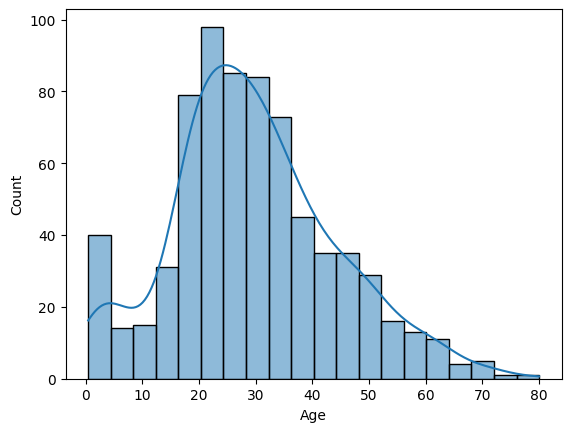

In [5]:
import seaborn as sns
sns.histplot(df['Age'].dropna(),kde=True)

<Axes: xlabel='Age', ylabel='Count'>

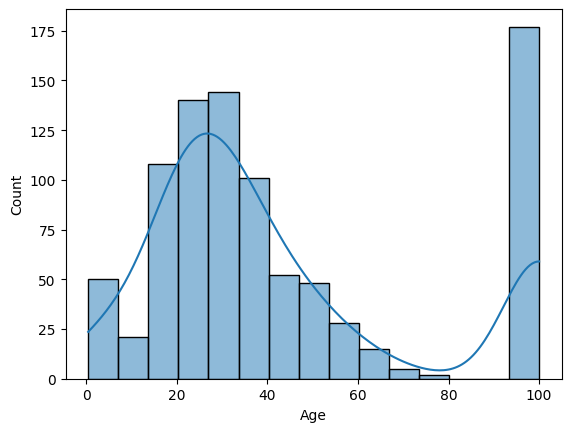

In [6]:
sns.histplot(df['Age'].fillna(100),kde=True)

<Axes: xlabel='Age', ylabel='Count'>

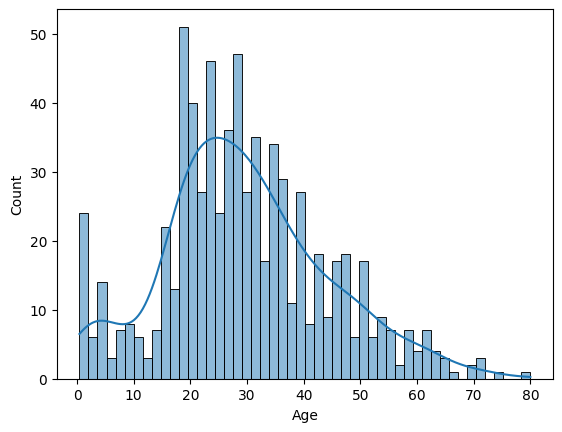

In [7]:
sns.histplot(df['Age'],kde=True,bins=50)

<Axes: >

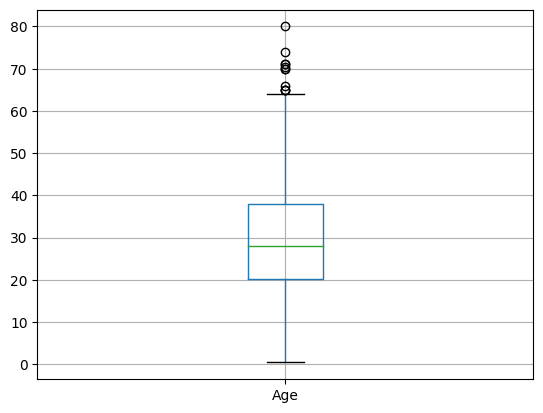

In [8]:
df.boxplot(column='Age')

In [9]:
df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

Assuming that Age follows A Gaussian Distribution we will calculate the boundaries which differentiates the outliers.

In [24]:
upper = df['Age'].mean()+ 3*df['Age'].std()
lower = df['Age'].mean()- 3*df['Age'].std()
lower , upper , df['Age'].mean()
## For Gausian distribution only this much steps is enough.

(-13.880374349943303, 73.27860964406094, 29.69911764705882)

Feature is Skewed.

<Axes: >

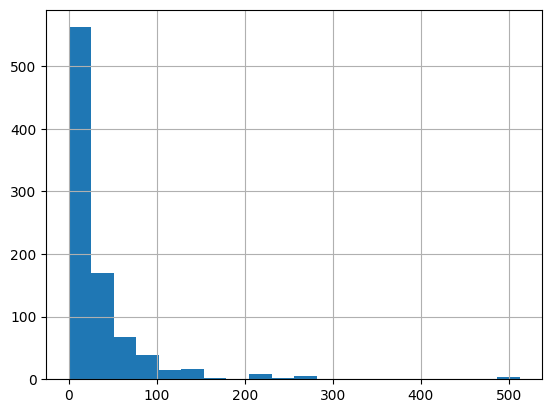

In [21]:
df['Fare'].hist(bins=20)

<Axes: >

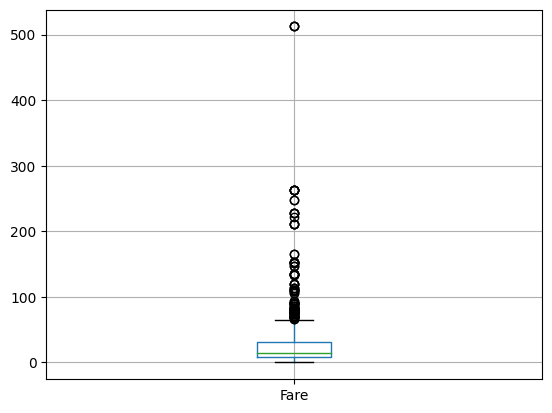

In [22]:
df.boxplot(column='Fare')

In [23]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [25]:
## Lets compute the Inter Quantile Range.
iqr = df['Fare'].quantile(.75) - df['Fare'].quantile(.25)
iqr

23.0896

In [26]:
lower_bridge = df['Fare'].quantile(.25)-iqr*1.5 # 1.5 value may be different according to the domain knowlegde.
upper_bridge = df['Fare'].quantile(.75)+iqr*1.5
lower_bridge,upper_bridge

(-26.724, 65.6344)

In [27]:
### for Extreme outliers.
lower_bridge = df['Fare'].quantile(.25)-iqr*3 # 1.5 value may be different according to the domain knowlegde.
upper_bridge = df['Fare'].quantile(.75)+iqr*3
lower_bridge,upper_bridge

(-61.358399999999996, 100.2688)

In [29]:
data = df.copy()

In [30]:
data.loc[data['Age']>=73,'Age'] = 73

In [31]:
data.loc[data['Fare']>=100,'Fare'] = 100

<Axes: >

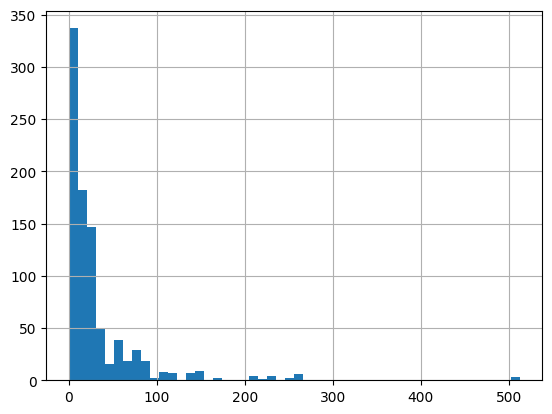

In [32]:
df.Fare.hist(bins=50)

<Axes: >

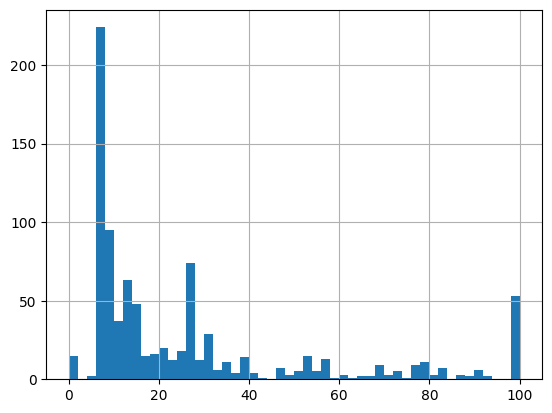

In [33]:
data.Fare.hist(bins=50)

<Axes: >

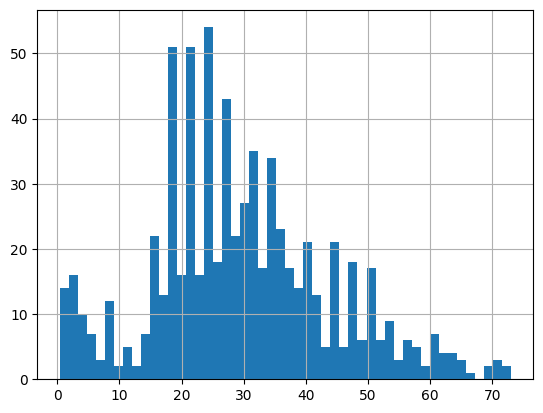

In [34]:
data.Age.hist(bins=50)

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[['Age','Fare']].fillna(0), data['Survived'], test_size=0.33, random_state=42)

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test,y_pred)),print(confusion_matrix(y_test,y_pred)), print(classification_report(y_test,y_pred))

0.6847457627118644
[[163  12]
 [ 81  39]]
              precision    recall  f1-score   support

           0       0.67      0.93      0.78       175
           1       0.76      0.33      0.46       120

    accuracy                           0.68       295
   macro avg       0.72      0.63      0.62       295
weighted avg       0.71      0.68      0.65       295



(None, None, None)